In [1]:
########################################################################################
# MINpuT made in collaberation between the Arias and Kim groups at Cornell University
# Drake Niedzielski, Eli Gerber, Yanjun Liu, Eun-Ah Kim, Tomas Arias
# February 19 2024
########################################################################################

import re
import numpy as np
import matplotlib.pyplot as plt

Angstrom = 0.529177 # This many Angstroms per bohr

# return a list of all lines in filename with pattern
def grep(pattern, filename):
    retval = [] 
    foundPattern = False
    file = open(filename, "r")
    for line in file:
        if re.search(pattern, line):
            retval.append(line)
            foundPattern = True
    if not foundPattern:
        print("grep failed to find:", pattern, "in", filename)
        print("returning an empty list")
    return retval

# NEED remove comments
def removeComments(stringList, commentChar):
    stringListNoComments = []
    for eachStr in stringList:
        # remove leading whitespace and then partition on the comment character
        partitionedLine = eachStr.lstrip().partition(commentChar) 
        #print(partitionedLine[0])
        if partitionedLine[0] != "":
            stringListNoComments.append(partitionedLine[0])
    return stringListNoComments
 
def readFor(pattern, filename):
    stringList = removeComments( grep() )
    if len(stringList) == 0:
        # No command provided -> choosing default value
        print()
    if len(stringList) > 1:
        print("WARNING! Multiple field entries found:")
        print(stringList)
        print("Choosing the first one by default")
    return stringList[0]

def readFor(pattern, filename):
    return chooseFirst( removeComments( grep() ) )
    
# Generated using chatGPT 7/19/23
# I haven't checked to see if it's 100% correct yet
atomic_numbers = {
    'H': 1,
    'He': 2,
    'Li': 3,
    'Be': 4,
    'B': 5,
    'C': 6,
    'N': 7,
    'O': 8,
    'F': 9,
    'Ne': 10,
    'Na': 11,
    'Mg': 12,
    'Al': 13,
    'Si': 14,
    'P': 15,
    'S': 16,
    'Cl': 17,
    'Ar': 18,
    'K': 19,
    'Ca': 20,
    'Sc': 21,
    'Ti': 22,
    'V': 23,
    'Cr': 24,
    'Mn': 25,
    'Fe': 26,
    'Ni': 28,
    'Co': 27,
    'Cu': 29,
    'Zn': 30,
    'Ga': 31,
    'Ge': 32,
    'As': 33,
    'Se': 34,
    'Br': 35,
    'Kr': 36,
    'Rb': 37,
    'Sr': 38,
    'Y': 39,
    'Zr': 40,
    'Nb': 41,
    'Mo': 42,
    'Tc': 43,
    'Ru': 44,
    'Rh': 45,
    'Pd': 46,
    'Ag': 47,
    'Cd': 48,
    'In': 49,
    'Sn': 50,
    'Sb': 51,
    'I': 53,
    'Te': 52,
    'Xe': 54,
    'Cs': 55,
    'Ba': 56,
    'La': 57,
    'Ce': 58,
    'Pr': 59,
    'Nd': 60,
    'Pm': 61,
    'Sm': 62,
    'Eu': 63,
    'Gd': 64,
    'Tb': 65,
    'Dy': 66,
    'Ho': 67,
    'Er': 68,
    'Tm': 69,
    'Yb': 70,
    'Lu': 71,
    'Hf': 72,
    'Ta': 73,
    'W': 74,
    'Re': 75,
    'Os': 76,
    'Ir': 77,
    'Pt': 78,
    'Au': 79,
    'Hg': 80,
    'Tl': 81,
    'Pb': 82,
    'Bi': 83,
    'Po': 84,
    'At': 85,
    'Rn': 86,
    'Fr': 87,
    'Ra': 88,
    'Ac': 89,
    'Th': 90,
    'Pa': 91,
    'U': 92,
    'Np': 93,
    'Pu': 94,
    'Am': 95,
    'Cm': 96,
    'Bk': 97,
    'Cf': 98,
    'Es': 99,
    'Fm': 100,
    'Md': 101,
    'No': 102,
    'Lr': 103,
    'Rf': 104,
    'Db': 105,
    'Sg': 106,
    'Bh': 107,
    'Hs': 108,
    'Mt': 109,
    'Ds': 110,
    'Rg': 111,
    'Cn': 112,
    'Nh': 113,
    'Fl': 114,
    'Mc': 115,
    'Lv': 116,
    'Ts': 117,
    'Og': 118
}        
   
####################################################################################
# Functions for writing the lattice, ion positions, and ion species to output files
# as of (PWscf, XCrysDen, CIF, VASP, Castep, and PDB)
####################################################################################

# Write to an ionpos file (JDFTx)
def writeIonposFile(ionpos,ionsp,fname):
    with open(fname,'w') as f:
        f.write("#Ionic Positions in Lattice Coordinates \n")
        for i in range(len(ionsp)):
            f.write("ion  "+ionsp[i]+" "+str(ionpos[i][0])+" "+str(ionpos[i][1])+" "+str(ionpos[i][2])+" 1 \n")

def writeLatticeFile(M, fname):
    with open(fname,'w') as f:
        f.write("lattice \ \n")
        for i in range(2):
            f.write(str(M[i][0])+"  "+str(M[i][1])+"  "+str(M[i][2])+" \ \n")
        f.write(str(M[2][0])+"  "+str(M[2][1])+"  "+str(M[2][2]))

# fname acts as the file pattern here e.g. "system.ionpos" and "system.lattice"
def writeJDFTx(M,ionpos,ionsp,path):
    print("Writing to", path+"/system.ionpos")
    writeIonposFile(ionpos,ionsp,path+"/system.ionpos")
    print("Writing to", path+"/system.lattice")
    writeLatticeFile(M, path+"/system.lattice")
        
def writeXSF(M,ionpos,ionsp,path):
    M_Angstrom = M*Angstrom
    
    print("Writing to", path+"/system.xsf")
    with open(path+"/system.xsf",'w') as xsf_file:
        xsf_file.write("CRYSTAL \n")
        xsf_file.write("PRIMVEC \n")
        for i in range(3):
            xsf_file.write("  "+str(M_Angstrom.T[i][0])+"   "+str(M_Angstrom.T[i][1])+"   "+str(M_Angstrom.T[i][2])+" \n")
        xsf_file.write("PRIMCOORD \n")
        xsf_file.write(str(len(ionpos))+"   1 \n")
        ionpos_Angstrom = lat2cart(M_Angstrom,ionpos)
        for i in range(len(ionpos)):
            xsf_file.write(str(atomic_numbers[ionsp[i]])+"  "+str(ionpos_Angstrom[i][0])+"  "+str(ionpos_Angstrom[i][1])+"  "+str(ionpos_Angstrom[i][2]) + " \n" )     
            
def writeCIF(M,ionpos,ionsp,path):
    # Convert the lattice from bohr to angstrom
    M_Angstrom = M*Angstrom
    # Compute magnitudes and angles
    a_vec, b_vec, c_vec = M_Angstrom[:,0], M_Angstrom[:,1], M_Angstrom[:,2]
    a_mag, b_mag, c_mag = np.linalg.norm(a_vec), np.linalg.norm(b_vec), np.linalg.norm(c_vec)
    alpha = np.arccos(np.dot(b_vec,c_vec)/(b_mag*c_mag))*180/np.pi # angle between b and c
    beta  = np.arccos(np.dot(a_vec,c_vec)/(a_mag*c_mag))*180/np.pi # angle between a and c
    gamma = np.arccos(np.dot(a_vec,b_vec)/(a_mag*b_mag))*180/np.pi # angle between a and b
    volume = np.abs (np.dot(np.cross(a_vec,b_vec),c_vec)) # scalar triple product is the volume
    
    print("Writing to", path+"/system.cif")
    # Open the CIF file for writing
    with open(path+"/system.cif",'w') as cif_file:
        
        # Write CIF header and lattice information
        cif_file.write("data_generated_by_python\n")
        cif_file.write("\n") # Spaces are important
        cif_file.write("_cell_length_a {:f}\n".format(a_mag))
        cif_file.write("_cell_length_b {:f}\n".format(b_mag))
        cif_file.write("_cell_length_c {:f}\n".format(c_mag))
        cif_file.write("_cell_angle_alpha {:f}\n".format(alpha)) # angle between b and c
        cif_file.write("_cell_angle_beta {:f}\n".format(beta))   # angle between a and c
        cif_file.write("_cell_angle_gamma {:f}\n".format(gamma)) # angle between a and b
        cif_file.write("_cell_volume {:f}\n".format(volume))
        cif_file.write("\n") # Spaces are important
        
        # Ignore symmetry information

        # Write atomic coordinates loop header
        cif_file.write("loop_\n")
        cif_file.write("_atom_site_type_symbol\n")
        cif_file.write("_atom_site_label\n")
        cif_file.write("_atom_site_fract_x\n")
        cif_file.write("_atom_site_fract_y\n")
        cif_file.write("_atom_site_fract_z\n")

        # Write atomic coordinates
        for i in range(len(ionsp)):
            cif_file.write("{}{} {} {:f} {:f} {:f}\n".format(ionsp[i], i, ionsp[i], ionpos[i][0], ionpos[i][1], ionpos[i][2] ))
        
        
def writePOSCAR(M,ionpos,ionsp,path):
    M_Angstrom = M.T*Angstrom # transpose for VASP convention 
    unique_ionsp, counts = np.unique(ionsp, return_counts=True)
    chemical_name = ""
    for i in range(len(unique_ionsp)):
        chemical_name += unique_ionsp[i]+str(counts[i])
        
    print("Writing to", path+"/POSCAR")
    with open(path+"/POSCAR",'w') as poscar_file:
        poscar_file.write(chemical_name+"\n")
        # Write Lattice information
        poscar_file.write("1.00\n")
        for i in range(3):
            poscar_file.write(str(M_Angstrom[i][0])+"  "+str(M_Angstrom[i][1])+"  "+str(M_Angstrom[i][2])+" \n")
        # Write the ionic species information
        for i in range(len(unique_ionsp)):
            poscar_file.write(unique_ionsp[i]+" ")
        poscar_file.write("\n")
        for i in range(len(counts)):
            poscar_file.write(str(counts[i])+" ")
        poscar_file.write("\n")
        # Write ionic position information in lattice coords
        poscar_file.write("Direct\n")
        for i in range(len(ionsp)):
            poscar_file.write("{:f} {:f} {:f}\n".format(ionpos[i][0], ionpos[i][1], ionpos[i][2] ))
            
# This just writes the ATOMIC_POSITIONS and CELL_PARAMETERS fields
# The rest is up to the user for now
def writePWscf(M,ionpos,ionsp,path):
    print("Writing to", path+"/pw.x")
    with open(path+"/pw.x",'w') as pwscf_file:
        pwscf_file.write("CELL_PARAMETERS bohr\n")
        for i in range(3):
            pwscf_file.write("{:f} {:f} {:f}\n".format(M[0][i], M[1][i], M[2][i])) # transpose convention
        pwscf_file.write("\n")
        # Ionic position and species information
        pwscf_file.write("ATOMIC_POSITIONS crystal\n")
        for i in range(len(ionsp)):
            pwscf_file.write("{} {:f} {:f} {:f}\n".format(ionsp[i], ionpos[i][0], ionpos[i][1], ionpos[i][2]))
    
# Use a dictionary to handle the different output cases
# "JDFTx","XSF","CIF","POSCAR","PWscf"
output_options = {"JDFTx" : writeJDFTx,
                  "XSF" : writeXSF,
                  "CIF" : writeCIF,
                  "POSCAR" : writePOSCAR,
                  "PWscf" : writePWscf
                 }
    
#########################################
# End section of output functions
#########################################

            
# Create dictionary of default values
inputParams = {
    "INPUT_FORMAT": "JDFTx",
    "OUTPUT_FORMAT": "JDFTx",
    "SubstrateLattice": None,
    "SubstrateIonpos": None,
    "FlakeLattice": None,
    "FlakeIonpos": None,
    "SubstrateCIF": None,
    "FlakeCIF": None,
    "FlakeTermination": "N",
    "TermAtomDist": ["0.0","bohr"],
    "FlakeEdgeHPC": "None",
    "FlakeXCOMHPC": "N",
    "FlakeYCOMHPC": "N",
    "FlakeRotaHPC": "N",
    "FlakeSupercell": None,
    "FlakeCut": [],              # Flake Cut can be issued multiple times
    "FlakeRotate": ["0.0", "rad", "0.0", "0.0", "bohr"],   # Rotate by 0 radians centered on the axis through 0.0, 0.0
    "FlakeShift": ["0.0", "0.0", "bohr"],
    "MinVacuumPad": ["5.0","5.0","bohr"],  # Padding between periodic images in the two different lattice directions
                                   # Use 0.0 to indicate a commensurate lock-in
    "InterlayerDistance": None,
    "LatticeVectorC": None
}

allowedParamValues = {
    "INPUT_FORMAT": [["JDFTx","CIF"]],
    "OUTPUT_FORMAT": [["JDFTx","XSF","CIF","POSCAR","PWscf"]],
    "SubstrateLattice": "ANY",
    "SubstrateIonpos": "ANY",
    "FlakeLattice": "ANY",
    "FlakeIonpos": "ANY",
    "SubstrateCIF": "ANY",
    "FlakeCIF": "ANY",
    "FlakeTermination": [["Y","N"]],
    "TermAtomDist": [["ANY"],["bohr","Angstrom"]],
    "FlakeEdgeHPC": "None",
    "FlakeXCOMHPC": [["Y","N"]],
    "FlakeYCOMHPC": [["Y","N"]],
    "FlakeRotaHPC": [["Y","N"]],
    "FlakeSupercell": [["ANY"], ["ANY"]],
    "FlakeCut": "ANY",
    "FlakeRotate": [ ["ANY"], ["rad","deg"], ["ANY"], ["ANY"], ["bohr","Angstrom","latticeFlake"]],   # Rotate by 0 radians centered on the axis through 0.0, 0.0
    "FlakeShift": [["ANY"], ["ANY"], ["bohr","Angstrom","latticeFlake","latticeSubstrate"]],
    "MinVacuumPad": [["ANY"],["ANY"], ["bohr","Angstrom"] ], 
    "InterlayerDistance": [["ANY"], ["bohr","Angstrom"] ], 
    "LatticeVectorC": [["ANY"],["ANY"],["ANY"],["bohr","Angstrom"]]
}

def isValidCommand(splitLine):
    #print(splitLine)
    key = splitLine[0]
    APVs = allowedParamValues[key]
    if APVs == "ANY":
        return True
    elif APVs == "None":
        print("WARNING: I haven't implemented",key,"yet, so this isn't doing anything")
        return True
    else:
        for i in range(len(splitLine)-1):
            if (not splitLine[i+1] in allowedParamValues[key][i]) and allowedParamValues[key][i][0] != "ANY":
                return False
    # Return True if it failed all of the invalidity checks   
    return True
            
    

In [3]:
#################################################################
# User should edit inFileName to the name of the input file they constructed ( <filename>.in )
inFileName = "graphene_hBN.in" #
#################################################################

    
# Parse the input file:
# Load entire input file into a list of strings
with open(inFileName, "r") as inFile:
    inFileLines = inFile.readlines()

# Remove leading whitespace and comments
inFileLines = removeComments(inFileLines,"#")

#print(inFileLines)

# For each parameter type
toBeRemoved = []
for key in inputParams:
    # handle the multiple FlakeCut commands separately
    if key != "FlakeCut":
        # find the first line starting with "key"
        for line in inFileLines:
            splitLine = line.split()
            if splitLine[0] == key:
                # update from the default value if the command is valid
                if isValidCommand(splitLine):
                    inputParams[key] = splitLine[1:]
                    # mark this line for removal from inFileLines
                    #inFileLines.remove(line)
                    toBeRemoved.append(line)
                    break
# Remove the found commands leaving the "FlakeCut"'s and unparsable lines
for line in toBeRemoved:
    inFileLines.remove(line)
print(inFileLines)
    
# Do another pass to handle the "FlakeCut" commands
toBeRemoved = []
for line in inFileLines:
    #print("line:", line)
    splitLine = line.split()
    if splitLine[0] == "FlakeCut": 
        inputParams["FlakeCut"].append(splitLine[1:])
        #inFileLines.remove(line)
        toBeRemoved.append(line)
# Remove the "FlakeCut" commands leaving only the unparsable lines
for line in toBeRemoved:
    inFileLines.remove(line)
    
# If there are remaining lines, then there were lines that didn't parse correctly
# Print those and exit
if len(inFileLines) > 0:
    print()
    print("ERROR: The following lines were unable to be parsed")
    for line in inFileLines:
        print(line)
    quit()
    print()

print(inputParams)

['FlakeCut 0.1 0.1  1  1 latticeFlake\n', 'FlakeCut 0 1.333 0 -1 latticeFlake\n', 'FlakeCut 7.937 6.35013 -1 -1 Angstrom\n']
{'INPUT_FORMAT': ['JDFTx'], 'OUTPUT_FORMAT': ['CIF'], 'SubstrateLattice': ['NbSe2.lattice'], 'SubstrateIonpos': ['NbSe2.ionpos'], 'FlakeLattice': ['NbSe2.lattice'], 'FlakeIonpos': ['NbSe2.ionpos'], 'SubstrateCIF': None, 'FlakeCIF': None, 'FlakeTermination': ['Y'], 'TermAtomDist': ['1.7', 'Angstrom'], 'FlakeEdgeHPC': 'None', 'FlakeXCOMHPC': 'N', 'FlakeYCOMHPC': 'N', 'FlakeRotaHPC': 'N', 'FlakeSupercell': ['3', '2'], 'FlakeCut': [['0.1', '0.1', '1', '1', 'latticeFlake'], ['0', '1.333', '0', '-1', 'latticeFlake'], ['7.937', '6.35013', '-1', '-1', 'Angstrom']], 'FlakeRotate': ['30', 'deg', '1.333333', '1.333333', 'latticeFlake'], 'FlakeShift': ['0.0', '0.0', 'latticeSubstrate'], 'MinVacuumPad': ['2.5', '2.5', 'Angstrom'], 'InterlayerDistance': ['2.5', 'Angstrom'], 'LatticeVectorC': ['0.0', '0.0', '18.0', 'Angstrom']}


Flake Supercell: 3.0 2.0


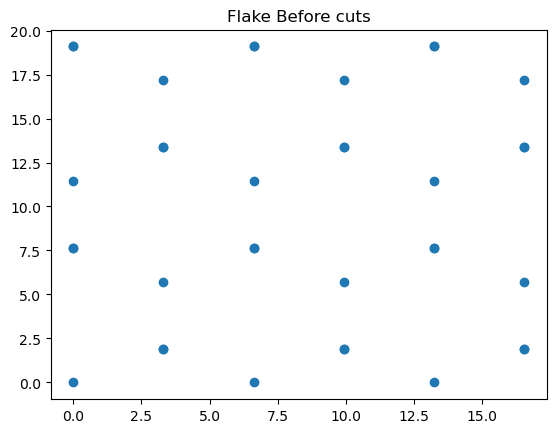

cut = ['0.1', '0.1', '1', '1', 'latticeFlake']
cut = ['0', '1.333', '0', '-1', 'latticeFlake']
cut = ['7.937', '6.35013', '-1', '-1', 'Angstrom']
cut = [19.84212, 0.0, -11.4559, 0.0, 'cartesian']
cut = [0.0, 22.9118, 0.0, -6.61404, 'cartesian']


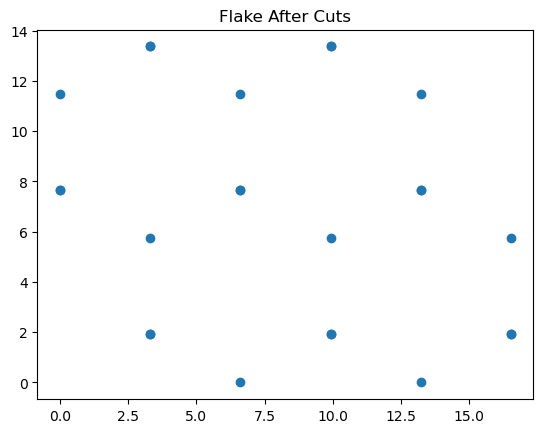

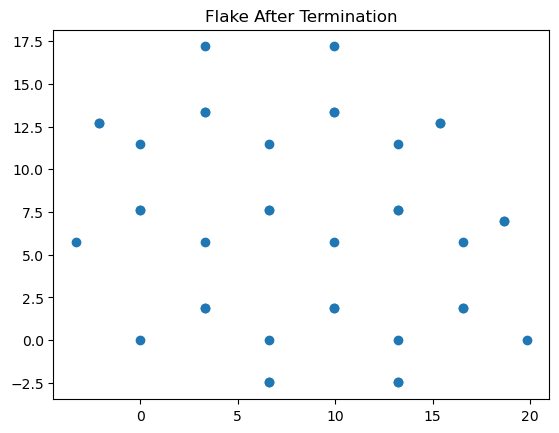

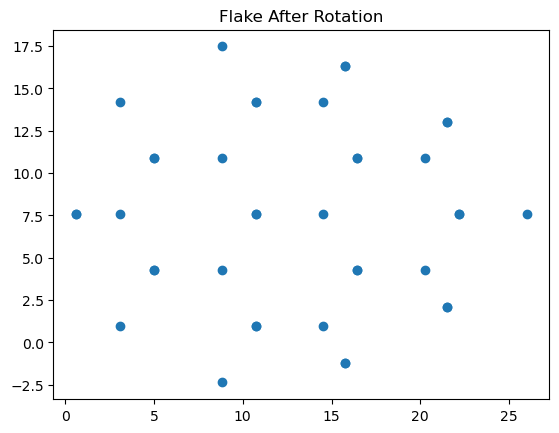

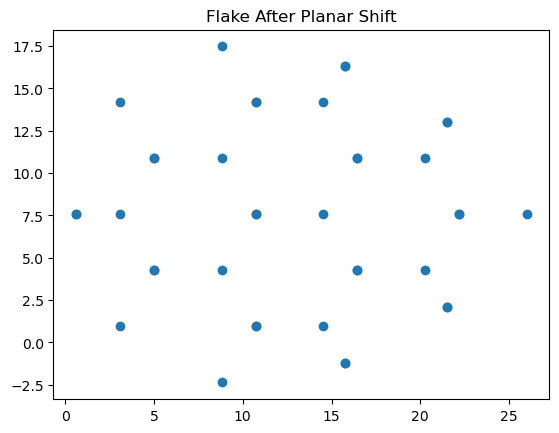

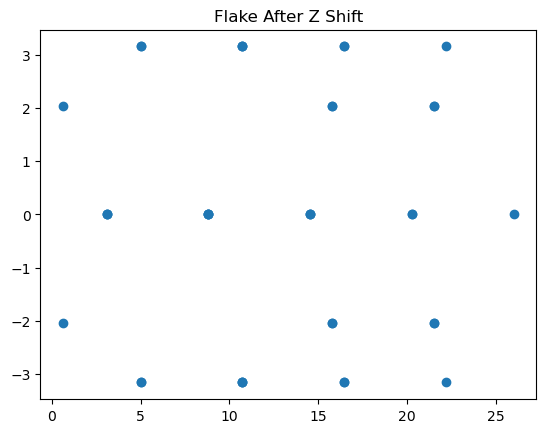

Making a 5 x 3 supercell of the substrate


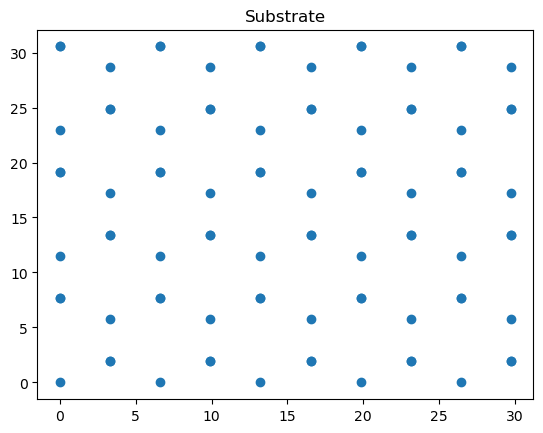

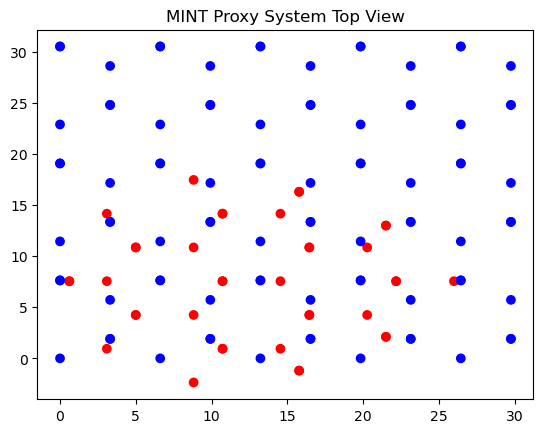

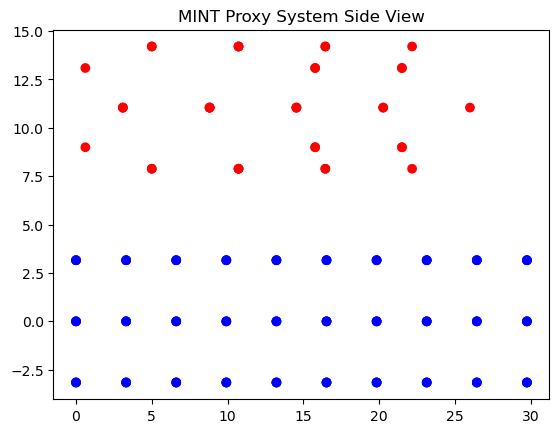

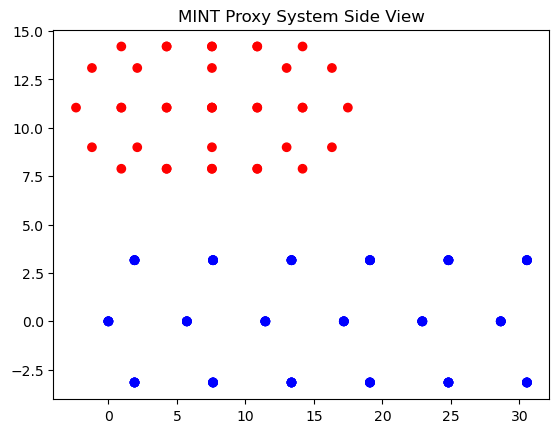

Writing to ./system.cif
Done!


In [4]:
#import time

# These reading functions will be specific to DFTCODE_INPUT ##########################
def get_ionpos_ionsp(path2file):
    ionspecies = []
    ionpos = []
    with open(path2file,'r') as file:
        # Skip the comment line at the top of the file
        line = file.readline()
        # record ionspecies, and lattice coordinate
        while line:
            line = file.readline()
            line_text = line.split()
            if len(line_text) > 0:
                if line_text[0] == "ion":
                    ionspecies.append(line_text[1])
                    ionpos.append([float(x) for x in line_text[2:5]])
    return ionpos,ionspecies  

def get_LatticeMatrix(path2file):
    LatticeMatrix = []
    with open(path2file,'r') as file:
        # skip the first two lines
        #line = file.readline()
        line = file.readline()
        # get the contents as a list of lines
        contents = file.readlines()
        LM = [line.split()[:3] for line in contents]
        LatticeMatrix = np.array([ [float(i) for i in lm] for lm in LM ])
    return LatticeMatrix

# TODO: This only works for nonsymmetrized fractional coordinate cif files
# This does NOT support _atom_site_Cartn_(x,y,z)
# ionspecies labels are from the "_atom_site_label" field
def readCIF_aux(path2file):
    # Read in the lattice parameters
    a = float( grep("_cell_length_a", path2file)[0].split()[1] )
    b = float( grep("_cell_length_b", path2file)[0].split()[1] )
    c = float( grep("_cell_length_c", path2file)[0].split()[1] )
    alpha = float(grep("_cell_angle_alpha", path2file)[0].split()[1])*np.pi/180
    beta = float(grep("_cell_angle_beta", path2file)[0].split()[1])*np.pi/180
    gamma = float(grep("_cell_angle_gamma", path2file)[0].split()[1])*np.pi/180
    
    # Form the lattice matrix s.t. a and b lie along the x-y plane
    a_vec = a*np.array([1,0,0])
    b_vec = b*np.array([np.cos(gamma),np.sin(gamma),0])
    cx = np.cos(beta)
    cy = (np.cos(alpha) - np.cos(beta)*np.cos(gamma) )/ np.sin(gamma)
    cz = np.sqrt(1-cx**2-cy**2)
    c_vec = c*np.array([cx,cy,cz])
    LatticeMatrix = (1.0/Angstrom)*np.array([a_vec,b_vec,c_vec]).T
    
    # Parse the file and locate the loop containing the atomic coordinate information
    ionpos = []
    ionsp = []
    with open(path2file,'r') as file:
        prevline = ""
        line = ""
        for line in file:            
            if prevline.strip() == "loop_" and "_atom_site" in line:
                # Put all the "_atom_site_*" commands into a list
                cmd_list = []
                while "_atom_site" in line:
                    cmd_list.append(line.strip()) # remove leading and trailing whitespace
                    prevline = line
                    line = file.readline()
                # 
                site_label_index = cmd_list.index("_atom_site_label")
                site_atom_x_index = cmd_list.index("_atom_site_fract_x")
                site_atom_y_index = cmd_list.index("_atom_site_fract_y")
                site_atom_z_index = cmd_list.index("_atom_site_fract_z")
                
                # Atom information listed until a whitespace
                while len(line.split()) > 1:
                    # make sure to remove all numbers from the label
                    split = line.split()
                    ionsp.append( ''.join([j for j in split[site_label_index] if not j.isdigit()]) ) 
                    ionpos.append( [float(split[site_atom_x_index]),float(split[site_atom_y_index]),float(split[site_atom_z_index])] )
                    prevline = line
                    line = file.readline()
                    
                break
            #
            prevline = line

    return ionpos, ionsp, LatticeMatrix

# returns ionpos, ionsp, and lattice information from the specified flake and substrate ionpos and lattice files
def readJDFTx():
    flakeIonpos, flakeIonsp = get_ionpos_ionsp(*inputParams["FlakeIonpos"])
    flakeLattice = get_LatticeMatrix(*inputParams["FlakeLattice"])
    subsIonpos, subsIonsp = get_ionpos_ionsp(*inputParams["SubstrateIonpos"])
    subsLattice = get_LatticeMatrix(*inputParams["SubstrateLattice"])
    return flakeIonpos, flakeIonsp, flakeLattice, subsIonpos, subsIonsp, subsLattice

# returns ionpos, ionsp, and lattice information from the specified flake and substrate cif files
def readCIF():
    flakeIonpos, flakeIonsp, flakeLattice = readCIF_aux(*inputParams["FlakeCIF"])
    subsIonpos, subsIonsp, subsLattice = readCIF_aux(*inputParams["SubstrateCIF"]) 
    return flakeIonpos, flakeIonsp, flakeLattice, subsIonpos, subsIonsp, subsLattice

# Use a dictionary to handle the different output cases
# "JDFTx","XSF","CIF","POSCAR","PWscf"
input_options = {"JDFTx" : readJDFTx,
                  "CIF" : readCIF,
                 }

######################################################################################

def lat2cart(M,ionpos):
    return np.dot(ionpos,np.transpose(M))
        
def cart2lat(M,ionpos):
    return np.dot(ionpos,np.linalg.inv(np.transpose(M)))

def make_supercell(M,ionpos,ionspecies,nx,ny,nz):
    newM = np.dot( M,np.diag((nx,ny,nz)) )
    newIonpos = []
    newIonspecies = []
    for i in range(nx):
        fi = i/nx
        for j in range(ny):
            fj = j/ny
            for k in range(nz):
                fk = k/nz
                for v in ionpos:
                    newIonpos.append([(i+v[0])/nx,(j+v[1])/ny,(k+v[2])/nz])
                newIonspecies = np.concatenate((newIonspecies,ionspecies))
    return newM,np.array(newIonpos),newIonspecies

# Read in the geometry of the flake and the substrate
flakeIonpos_uc, flakeIonsp_uc, flakeLattice_uc, subsIonpos_uc, subsIonsp_uc, subsLattice_uc = input_options[inputParams["INPUT_FORMAT"][0]]()
       
# Ensure that the flake and substract fractional ion positions are compact i.e. -0.5 < z < 0.5
# This ensures transformation to cartesian coordinates works properly
flakeIonpos_uc = np.array(flakeIonpos_uc)
subsIonpos_uc = np.array(subsIonpos_uc)
flakeIonpos_uc[:,2] = np.mod(flakeIonpos_uc[:,2] + 0.5, 1.0) - 0.5
subsIonpos_uc[:,2]  = np.mod(subsIonpos_uc[:,2] + 0.5,  1.0) - 0.5
    
#print(flakeIonpos_uc)
#print(flakeIonsp_uc)
#print(flakeLattice_uc)

#print(subsIonpos_uc)
#print(subsIonsp_uc)
#print(subsLattice_uc)

# Edit ionsp to add unique identity to each of the atoms from the unitcell (e.g. C1, C2, ...)
# This will let me identify their unique nieghborhoods when doing flake termination
cur_sp = flakeIonsp_uc[0]
count = 0
for i in range(len(flakeIonsp_uc)):
    sp = flakeIonsp_uc[i]
    if sp != cur_sp:
        cur_sp = sp
        count = 0
    flakeIonsp_uc[i] += str(count)
    count += 1

#print(flakeIonsp_uc)
    

# For each atom in the flake's unit cell
my_tuple_list = []
for i in range(len(flakeIonpos_uc)):
    sc_lat,sc_ip,sc_is = make_supercell(flakeLattice_uc,flakeIonpos_uc,flakeIonsp_uc,3,3,1)
    centerCell_ip = flakeIonpos_uc + np.array([1,1,0])
    
    # convert to cartesian coords
    sc_ip = lat2cart(sc_lat,sc_ip)
    centerCell_ip = lat2cart(flakeLattice_uc,centerCell_ip)
    
    # compute displacements from atom i to all other atoms
    # sort from smallest to largest
    disps = sc_ip - centerCell_ip[i]
    dists = np.linalg.norm(disps,axis=1)
    sort_indecies = np.argsort(dists)
    disps = disps[sort_indecies]
    dists = dists[sort_indecies]
    
    # Find the displacements to the 1NNs
    NN_cart_disps = [disps[1]] # skip the zero displacement to itself
    for j in range(2,len(disps)):
        if abs(dists[j]-dists[j-1]) < 0.5:  # noise tolerance of 0.5 bohr
            NN_cart_disps.append(disps[j])
        else:
            break
            
    # Add a new tuple to the key, values list
    my_tuple_list.append((flakeIonsp_uc[i],NN_cart_disps))

# Create a dictionary where keys are unique unitcell ion labels, values are the displacements to its 1NNs 
NN_dict = dict(my_tuple_list)
    
#print(NN_dict)

# Create Flake supercell 
# Handle the possibility of fractional supercells by generating a ceil(nx) x ceil(ny) supercell
# And adding two additional cuts
nx = float(inputParams["FlakeSupercell"][0])
ny = float(inputParams["FlakeSupercell"][1])
print("Flake Supercell:", nx,ny)
flakeLattice,flakeIonpos,flakeIonsp = make_supercell(flakeLattice_uc,flakeIonpos_uc,flakeIonsp_uc,int(np.ceil(nx)),int(np.ceil(ny)),1) 
Ra_cart = lat2cart(flakeLattice_uc,np.array([nx,0,0]))
Rb_cart = lat2cart(flakeLattice_uc,np.array([0,ny,0]))
inputParams["FlakeCut"].append([Ra_cart[0],Ra_cart[1],-flakeLattice_uc[1][1], flakeLattice_uc[0][1],"cartesian"]) # R+90
inputParams["FlakeCut"].append([Rb_cart[0],Rb_cart[1], flakeLattice_uc[1][0],-flakeLattice_uc[0][0],"cartesian"]) # R-90

# Convert to Cartesian
flakeIonpos = lat2cart(flakeLattice,flakeIonpos)

plt.title("Flake Before cuts")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,1])
plt.show()

# Perform Cuts on the Flake
for cut in inputParams["FlakeCut"]:
    print("cut =", cut)
    center = np.array([float(cut[0]),float(cut[1]),0.0])
    normal = np.array([float(cut[2]),float(cut[3]),0.0])
    
    # convert into cartesian coordinates if given in flake lattice coordinates
    if cut[4] == "Angstrom":
        center /= Angstrom
        normal /= Angstrom
    elif cut[4] == "latticeFlake":
        center = lat2cart(flakeLattice_uc,center)
        normal = lat2cart(flakeLattice_uc,normal)
    
    # toss all the ions on the negative side of the cut
    delList = []
    for i in range(len(flakeIonpos)):
        #print("flakeIonpos[i]-center", flakeIonpos[i]-center)
        #print("normal",normal)
        if np.dot(flakeIonpos[i]-center, normal) <= 0:
            delList.append(i)
            #print("removing this ion!")
    flakeIonpos = np.delete(flakeIonpos,delList,axis=0)
    flakeIonsp = np.delete(flakeIonsp,delList)
    
plt.title("Flake After Cuts")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,1])
plt.show()


# Now I have a trimmed flake in cartesian coordinates
# Terminate the edges of the flake with placeholder atoms to fill up 1NN sites of the edge atoms
#print("*inputParams[FlakeTermination]", *inputParams["FlakeTermination"])
if inputParams["FlakeTermination"][0] == 'Y':
    terminators = np.array([[]]) # Termination sites
    coordnums = np.array([]) # Coordination numbers of termination sites
    dispsFromFlake = []
    for i in range(len(flakeIonpos)):
        # Identify its desired 1NN sites
        NN_disps = NN_dict[ flakeIonsp[i] ] 
        NN_sites = NN_disps + flakeIonpos[i]

        # If any of its desired 1NN sites are not occupied, and not already in the list of flake terminators, add the site
        for j in range(len(NN_sites)): 
            site = NN_sites[j]
            # consider a site filled if it is occupied within a tolerance of 0.1 bohr
            if np.min( np.linalg.norm(flakeIonpos - site, axis=1) ) >= 0.1 :
                # Just add this site if no other termination sites identified
                if terminators.shape[1] == 0:
                    terminators = np.append(terminators,[site],axis=1)
                    coordnums = np.append(coordnums,[1])
                    dispsFromFlake.append([NN_disps[j]]) # store displacement vector from flake to this site
                # Add if this site not shared by a previous atom
                elif np.min( np.linalg.norm(terminators - site, axis=1) ) >= 0.1 :
                    terminators = np.append(terminators,[site],axis=0)
                    coordnums = np.append(coordnums,[1])
                    dispsFromFlake.append([NN_disps[j]]) # store displacement vector from flake to this site
                # Else increment the coordination number of this termination site
                else:
                    indx = np.argmin( np.linalg.norm(terminators - site, axis=1) )
                    coordnums[indx] += 1 
                    dispsFromFlake[indx].append(NN_disps[j])

    #print("Terminating Sites:")
    #print(terminators)
    #print("Coordination Numbers:")
    #print(coordnums)
    #print("Displacements from the flake:")
    #print(dispsFromFlake)
    
    # It is neccessary to reduce the distance of the coordnum=1 terminating sites if they are a small atom (e.g. H)
    # Otherwise they may not bond to or stabilize the flake edge
    for i in range(len(coordnums)):
        if coordnums[i] == 1 and float(inputParams["TermAtomDist"][0]) != 0:
            newdisp = (dispsFromFlake[i][0] / np.linalg.norm(dispsFromFlake[i][0]) ) * float(inputParams["TermAtomDist"][0])
            if inputParams["TermAtomDist"][1] == "Angstrom":
                newdisp /= Angstrom
            terminators[i] -= dispsFromFlake[i][0]
            terminators[i] += newdisp
                    
    # Add terminating atoms to the MINT flake
    flakeIonpos = np.concatenate((flakeIonpos,terminators))
    flakeIonsp = np.concatenate((flakeIonsp,['H']*len(terminators)))

    
    
# Remove unique ionsp labels from the flake
for i in range(len(flakeIonsp)):
    flakeIonsp[i] = ''.join([j for j in flakeIonsp[i] if not j.isdigit()])

plt.title("Flake After Termination")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,1])
plt.show()

# Rotate the flake about the specified axis
rotateParams = inputParams["FlakeRotate"] #"FlakeRotate": ["0.0", "rad", "0.0", "0.0", "cartesian"]
#print(rotateParams)
if rotateParams[1] == "rad":
    theta = float(rotateParams[0])
elif rotateParams[1] == "deg":
    theta = float(rotateParams[0]) * np.pi/180
else:
    print("FlakeRotate needs to be [theta] [deg/rad] [x] [y] [cartesian/latticeFlake]")
    theta = float(rotateParams[0])

center = np.array([float(rotateParams[2]),float(rotateParams[3]),0.0])
if rotateParams[4] == "Angstrom":
    center /= Angstrom 
elif rotateParams[4] == "latticeFlake":
    center = lat2cart(flakeLattice_uc,center)
    
# Shift flake so that the rotation center lies at the origin
flakeIonpos -= center 
# Rotate the flake in the centered coordinate system
R = np.array([[np.cos(theta),-np.sin(theta),0.],
              [np.sin(theta), np.cos(theta),0.],
              [           0.,            0.,1.]])
flakeIonpos = np.dot(R,flakeIonpos.T).T
# Shift back to original location
flakeIonpos += center

plt.title("Flake After Rotation")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,1])
plt.show()

# Shift the flake by the prescribed ammount
shiftParams = inputParams["FlakeShift"] # "FlakeShift": ["0.0", "0.0", "cartesian"]
shift = np.array([float(shiftParams[0]),float(shiftParams[1]),0.0])
if shiftParams == "Angstrom":
    shift /= Angstrom 
elif shiftParams == "latticeFlake":
    shift = lat2cart(shift,flakeLattice_uc)
elif shiftParams == "latticeSubstrate":
    shift = lat2cart(shift,subsLattice_uc)

flakeIonpos += shift
    
plt.title("Flake After Planar Shift")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,1])
plt.show()

plt.title("Flake After Z Shift")
plt.scatter(flakeIonpos[:,0],flakeIonpos[:,2])
plt.show()
    
    
# Generate the smallest substrate supercell that fits the flake

# Naive but easy to code
def getMinDist(setA,setB):
    retval = np.infty
    for a in setA:
        for b in setB:
            d = np.linalg.norm(a-b)
            if d < retval:
                retval = d
    return retval

pad_a1 = float(inputParams["MinVacuumPad"][0])
pad_a2 = float(inputParams["MinVacuumPad"][1])

if inputParams["MinVacuumPad"][2] == "Angstrom":
    pad_a1 /= Angstrom
    pad_a2 /= Angstrom

# Substrate Unitcell Lattice Vectors
a1 = subsLattice_uc[:,0] #np.array([1.5*a, SQRT3_2*a,0.0])
a2 = subsLattice_uc[:,1] #np.array([1.5*a,-SQRT3_2*a,0.0])

maxiter = 100
m_a1 = 1
for m in range(1,maxiter):
    d = getMinDist(flakeIonpos,flakeIonpos + m*a1)
    if d >= pad_a1: 
        m_a1 = m
        break

n_a2 = 1
for n in range(1,maxiter):
    d = getMinDist(flakeIonpos,flakeIonpos + n*a2)
    if d >= pad_a2: # 5 bohr
        n_a2 = n
        break

print("Making a",m_a1, "x",n_a2, "supercell of the substrate")

# Now construct the supercell
subsLattice, subsIonpos, subsIonsp = make_supercell(subsLattice_uc,subsIonpos_uc,subsIonsp_uc,m_a1,n_a2,1) # returns in lattice coords
subsIonpos = lat2cart(subsLattice,subsIonpos)

plt.title("Substrate")
plt.scatter(subsIonpos[:,0],subsIonpos[:,1])
plt.show()

#print("SubsIonpos:")
#print(subsIonpos)

# Finally it's time to place the flake on top of the substrate

#find the z-coord on the top most substrate atom. This is the top of the substrate
subsTop = np.max(subsIonpos[:,2])

#find the z-coord on the bottom most flake atom. This is the bottom of the flake
flakeBot = np.min(flakeIonpos[:,2])

#shift the flake in the z-dir so that it lies on top of the substrate separated by the indicated distance
il_dist = float( inputParams["InterlayerDistance"][0] )
if inputParams["InterlayerDistance"][1] == "Angstrom":
    il_dist /= Angstrom
flakeIonpos += np.array([0.0,0.0,il_dist-(flakeBot-subsTop)])

# Combine the flake and substrate
ionpos = np.concatenate((flakeIonpos,subsIonpos))
ionsp = np.concatenate((flakeIonsp,subsIonsp))
# Make a list of colors for debug plot visualization:
colors = len(flakeIonpos)*['r'] + len(subsIonpos)*['b']

plt.title("MINT Proxy System Top View")
plt.scatter(ionpos[:,0],ionpos[:,1], c=colors)
plt.show()

plt.title("MINT Proxy System Side View")
plt.scatter(ionpos[:,0],ionpos[:,2], c=colors)
plt.show()

plt.title("MINT Proxy System Side View")
plt.scatter(ionpos[:,1],ionpos[:,2], c=colors)
plt.show()


# The out of plane lattice vector is specified by the user
# This allows for the possibily of different interlayer stacking
lattice = subsLattice
c_vec = np.array([float(inputParams["LatticeVectorC"][0]),float(inputParams["LatticeVectorC"][1]),float(inputParams["LatticeVectorC"][2])])
if inputParams["LatticeVectorC"][3] == "Angstrom":
    c_vec /= Angstrom
lattice[:,2] = c_vec

# Finally, convert back into lattice coordinates
ionpos = cart2lat(lattice,ionpos)

# Now sort by ionspecies type
# TODO: maybe sort each ionspecies by their z-coordinate or distance from the x-y plane
#       this would allow post-processing scripts to more easily separate the flake from the substrate
sort_inds = np.argsort(ionsp)
ionsp = ionsp[sort_inds]
ionpos = ionpos[sort_inds]

# Write structure files based on the chosen DFTCODE_OUTPUT
path = "."
output_options[inputParams["OUTPUT_FORMAT"][0]](lattice,ionpos,ionsp,path)
#output_options[x](lattice,ionpos,ionsp,path)

print("Done!")